In [16]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
# in subsequent iterations
df = pd.read_pickle('df_un_general_debates.pkl')

In [40]:
# df.to_pickle('df_un_general_debates.pkl')

In [3]:
# read csv
df = pd.read_csv("un-general-debates-blueprint.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 410.7+ KB


## Double check variable "position" 
* AKA let's inspect these non-NaN values

* There are also a handful of NaN for the variable "speaker" 

In [10]:
df.query('position.notnull()', engine='python')

,session,year,country,country_name,speaker,position,text
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...
14,25,1970,DOM,Dominican Republic,Mr FERNANDEZ G.,,"\n\n\n Mr. President, it was a source of great..."
21,25,1970,GMB,Gambia,Mr. JAWARA,President,2.\tPresident : President of Gambia . Mr. Pres...
135,26,1971,MEX,Mexico,Mr. ECHEVERRIA ALVAREZ,President,"2.\t Mr. President, on behalf of the people an..."
323,28,1973,BHS,Bahamas,Pindling,Prime Minister,﻿As this is the first opportunity which the Co...
...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...


* we will handle this missing data later 

In [23]:
# 27 missing speaker values
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [24]:
# as speaker is not overly important to us (looking for trends by country, year and topic of the speech) 
## can just quickly fill in these missing values with just that "unknown"
df['speaker'].fillna('unknown', inplace=True)

## Basic overview of text stats
* 

In [12]:
# as text is "object" dtype, first convert to "string" then apply len, assign to new col named "length"
df['length'] = df['text'].str.len()

In [17]:
# inspect summary for non-numerical columns
df[['country','speaker']].describe(include='O').T

,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


* 199 unique countries
* 5428 unique speakers seems ... perhaps extreme
    * will need to investigate further 

In [18]:
# repeat for numerical columns
## obviously, mean and std etc. for year/session are non-sensical
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


* given we know the data is from 25th to the 70th UN generate debate sessions; the years 1970-2015 make sense
* Not much to do with the stats about length just yet
    * but we can see there is a right-skewed distribution 
    * Apparent also as the average is greater than the median + max value is far from the average while min is a fair amount closer to the centre of the data 

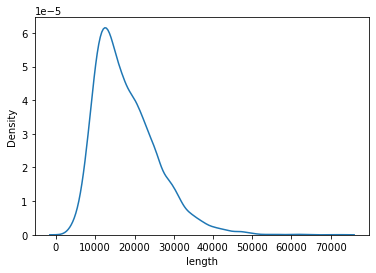

In [22]:
# just for curiosity, we can confirm visually this right-skew with a simple KDE 
sns.kdeplot(data=df, x='length');

### Also inspect some specifics on length for the permanent members of the UN security council 

In [35]:
# set a mask variable for the main DF where the data is in (united states, france, great britan, china, russia) respectively
un_perm_members = df['country'].isin(['USA','FRA','GBR','CHN','RUS'])

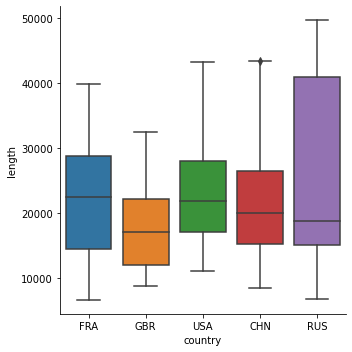

In [41]:
sns.catplot(data=df[un_perm_members], 
           x = 'country',
           y = 'length', 
           kind='box');

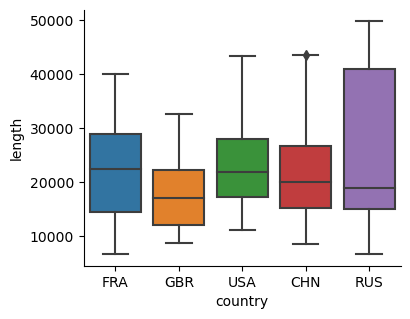

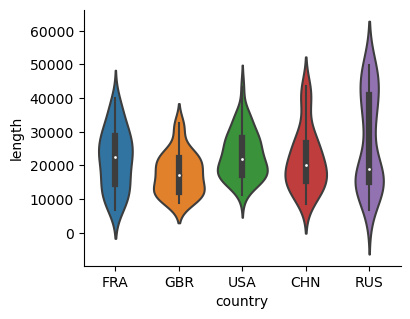

In [43]:
g = sns.catplot(data=df[un_perm_members], x="country", y="length", kind='box')
g.fig.set_size_inches(4, 3) ###
g.fig.set_dpi(100) ###
g = sns.catplot(data=df[un_perm_members], x="country", y="length", kind='violin')
g.fig.set_size_inches(4, 3) ###
g.fig.set_dpi(100) ###

## Try inspect the large amount of unique speaker values
* let's start with a country where we are more familiar with the presidents (aka more recognisable names) 
    * E.G. the USA

In [34]:
# let's print out each unique speaker for the USA
for i in (np.unique(df.query('country=="USA"')['speaker'])):
    print(i)

Barack Obama
Bill Clinton
Bush
Condoleezza Rice
GEORGE BUSH
George Bush
George W. Bush
Jimmy Carter
Kissinger
Madeleine Korbel Albright
Mr Haig 
Mr.  Kissinger
Mr. Christopher
Mr. George BUSH
Mr. George W Bush
Mr. George W. Bush
Mr. Kissinger
Mr. ROGERS
Mr. Rogers 
Mr. Shultz
Mr. William Clinton
Mr. YOST
Muskie
President Reagan
RONALD REAGAN
Reagan
Ronald Reagan
SHULTZ 
Vance
William Clinton
William J. Clinton
William Jefferson Clinton


* We can see a few different iterations for Bush, Kissinger, Clintons etc. 
* There are multiple spellings for multiple different speakers, most likely this is for every country too
##### given our analysis is not initially focused on the speaker, we can ignore this for now and rectify it later if we want to dive deeper into the speaker analysis

In [30]:
#E.G. all the different spellings containing "bush"
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: speaker, dtype: int64

## AGGREGATE TRENDS OVER TIME 
* E.G. Avg speech length across each convention / number of unique countries participating since 1970

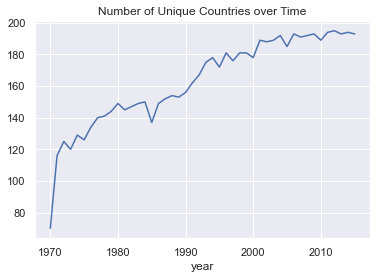

In [17]:
# countries participating by year 
df.groupby('year').size().plot(title="Number of Unique Countries over Time");

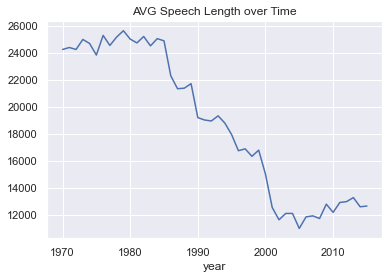

In [19]:
## AVG speech length (aggregate average) by year
df.groupby('year')['length'].mean().plot(title='AVG Speech Length over Time');

* Somewhat makes sense that as more countries join, the time each respective country has to talk has reduced to stop overall runtime from exploding
    * An interesting titbit, but nothing groundbreaking yet 

## NEXT STEPS: TOKENIZE / DOCUMENT TERM MATRIX 
* Thus, enabling further analysis 